# Multi linear regression startup assignment


Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [107]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot


In [43]:
startup = pd.read_csv("50_Startups.csv")

In [44]:
startup.shape

(50, 5)

In [45]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [46]:
#checking for the missing values
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [47]:
#finding null values and data types
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


there are no missing/null values and 

In [48]:
# checking for the correlation
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


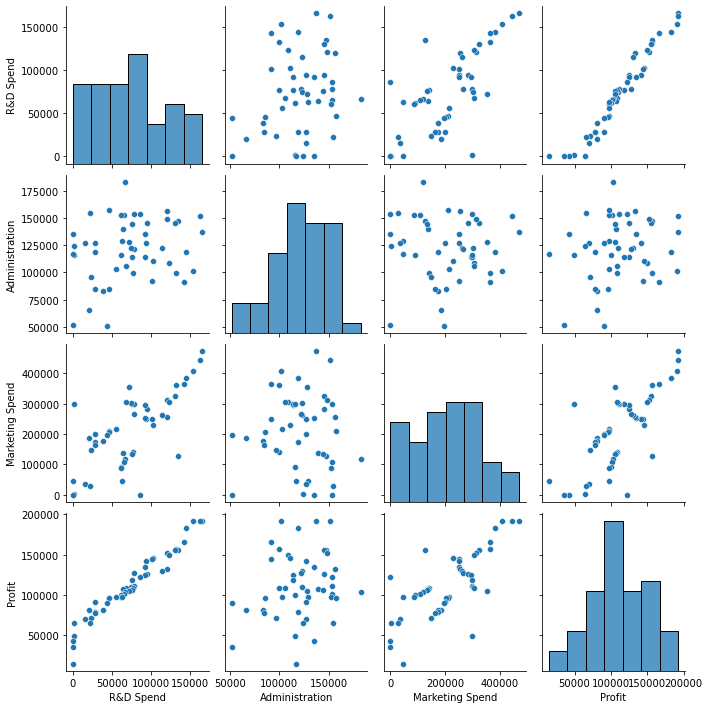

In [49]:
#creating the pairplot-->it gives the information about correlation inthe data
sns.pairplot(startup.iloc[:,:])

in that pair plot we got histgrograms also means that we cannot creat the scatter plot between the same colunm

In [50]:
#creating the data frames 
RDspend=pd.DataFrame(startup['R&D Spend'])
Mspend=pd.DataFrame(startup['Marketing Spend'])

In [51]:
RDspend.head()

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [52]:
Mspend.head()

,Marketing Spend
0,471784.10
1,443898.53
2,407934.54
3,383199.62
4,366168.42


# Creating the models

In [53]:
#creating the model-->salary VS RDspend+Administration+Mspend
#assumption 1 ==> all the X-variables are independent of each other are not 
model = smf.ols('Profit~RDspend+Administration+Mspend',data=startup).fit()

In [54]:
#getting the parameters 
model.params

Intercept         50122.192990
RDspend               0.805715
Administration       -0.026816
Mspend                0.027228
dtype: float64

In [55]:
print(model.tvalues, '\n' ,model.pvalues)

Intercept          7.626218
RDspend           17.846374
Administration    -0.525507
Mspend             1.655077
dtype: float64 
 Intercept         1.057379e-09
RDspend           2.634968e-22
Administration    6.017551e-01
Mspend            1.047168e-01
dtype: float64


In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           4.53e-30
Time:                        09:48:32   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDspend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mspend             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# creating the model by using simple linear regression

In [57]:
#the model is created with y variable as a profit and others as a x variables

In [58]:
ml_RD=smf.ols('Profit~RDspend',data=startup).fit()

In [59]:
#getting the t and p values
print(ml_RD.tvalues, '\n' ,ml_RD.pvalues)

Intercept    19.320288
RDspend      29.151139
dtype: float64 
 Intercept    2.782697e-24
RDspend      3.500322e-32
dtype: float64


In [60]:
ml_RD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           3.50e-32
Time:                        09:48:35   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RDspend        0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
ml_admin=smf.ols('Profit~Administration',data=startup).fit()
print(ml_admin.tvalues,'\n' , ml_admin.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [62]:
ml_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 09 Jun 2022   Prob (F-statistic):              0.162
Time:                        09:48:36   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
ml_mspend=smf.ols('Profit~Mspend',data=startup).fit()
print(ml_mspend.tvalues,ml_mspend.pvalues)

Intercept    7.808356
Mspend       7.802657
dtype: float64 Intercept    4.294735e-10
Mspend       4.381073e-10
dtype: float64


In [64]:
ml_mspend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           4.38e-10
Time:                        09:48:36   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Mspend         0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
'''second assumption : the features and the errors obtained are independent of each other 
for that we use VIF if vif is more approx more than 20 the features are  is not suitable for
the prediction''' 

'second assumption : the features and the errors obtained are independent of each other \nfor that we use VIF if vif is more approx more than 20 the features are  is not suitable for\nthe prediction'

In [65]:
rsq_pro = smf.ols('Profit~RDspend+Administration+Mspend',data=startup).fit().rsquared
vif_pro = 1/(1-rsq_pro)

rsq_rd = smf.ols('RDspend~Profit+Administration+Mspend',data=startup).fit().rsquared
vif_rd = 1/(1-rsq_rd)

rsq_adm = smf.ols('Administration~Profit+RDspend+Mspend',data=startup).fit().rsquared
vif_adm = 1/(1-rsq_adm)

rsq_ms = smf.ols('Mspend~Profit+RDspend+Administration',data=startup).fit().rsquared
vif_ms = 1/(1-rsq_ms)

#Storing vif values in a data frame 
d1 = {"Variables":['profit','rdspend','administration','marketspend'],"VIF":[vif_pro,vif_rd,vif_adm,vif_ms]}
vif_frame = pd.DataFrame(d1)
vif_frame


,Variables,VIF
0,profit,20.302917
1,rdspend,19.563001
2,administration,1.182146
3,marketspend,2.465332


since all the vif values which we got are good and they were independent of each other

In [67]:
# third assumption the errors comming from the normal distribution
#Residual analysis is used
#Test for Normality of residuals (Q-Q plot)

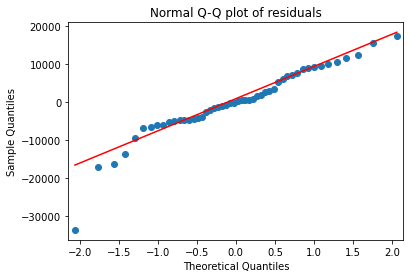

In [74]:
import statsmodels.api as smf
qqplot = smf.qqplot(model.resid,line='q') #line == 45 to draw the diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [75]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

In [ ]:
#fourth model for homoscedasticity

In [78]:
def get_standardized_values(vals ):
    return (vals - vals.mean())/(vals.std())

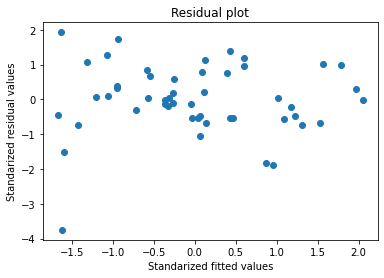

In [80]:

plt.scatter(get_standardized_values(model.fittedvalues)
            ,get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standarized fitted values')
plt.ylabel('Standarized residual values')

plt.show()

In [81]:
#ploting the graph residual vs regressors

eval_env: 1


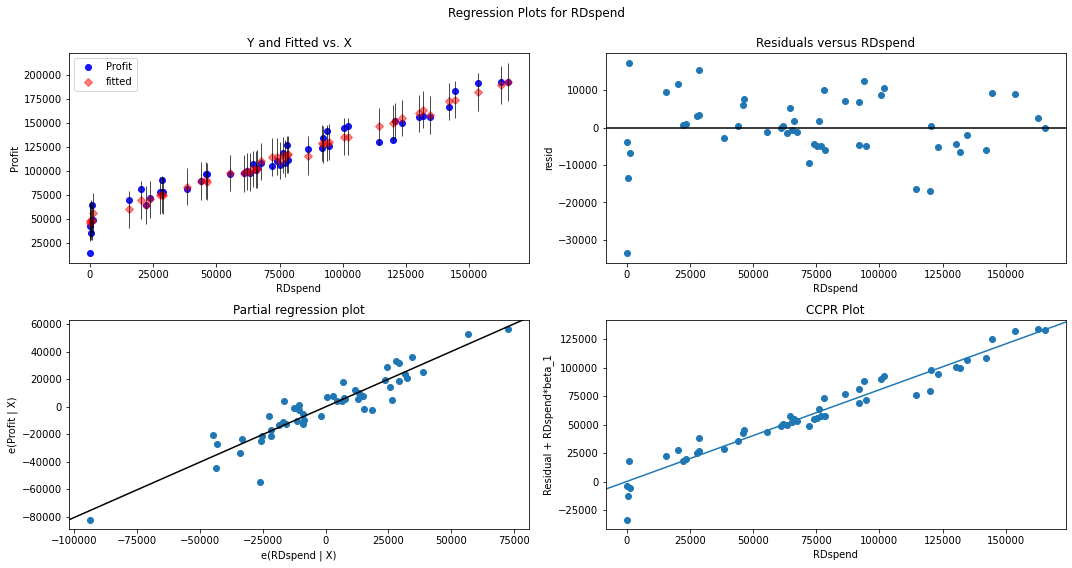

In [82]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model,"RDspend",fig=fig)
plt.show()

eval_env: 1


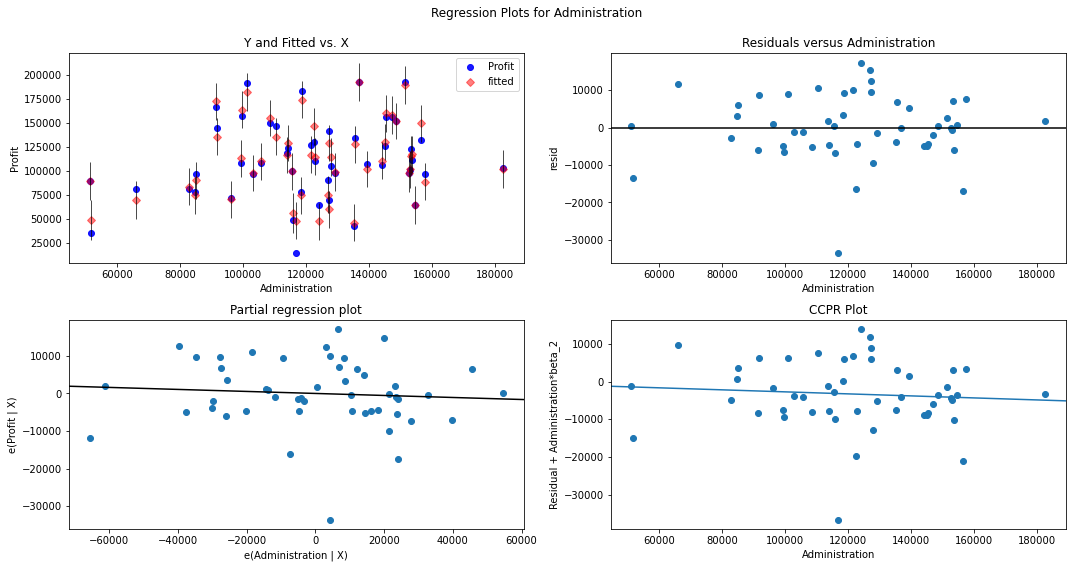

In [83]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

eval_env: 1


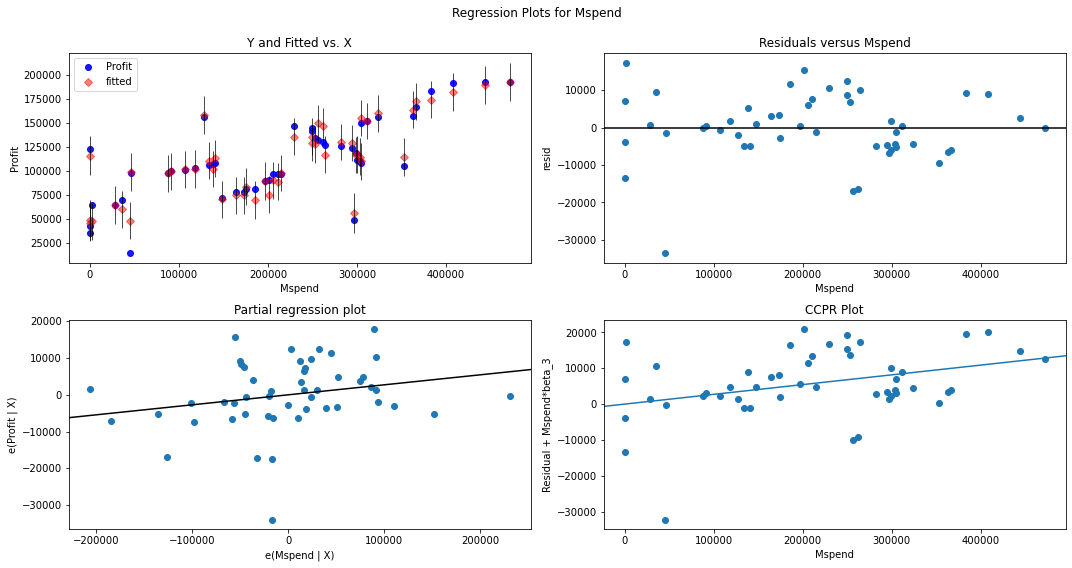

In [84]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model,"Mspend",fig=fig)
plt.show()

In [85]:
#model deletion diagnostics
#detecting influencers/outliers
#by using cooks distance

In [87]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [88]:
startup.shape

(50, 5)

In [90]:
K=3
N=50
3*(K+1)/N 

0.24

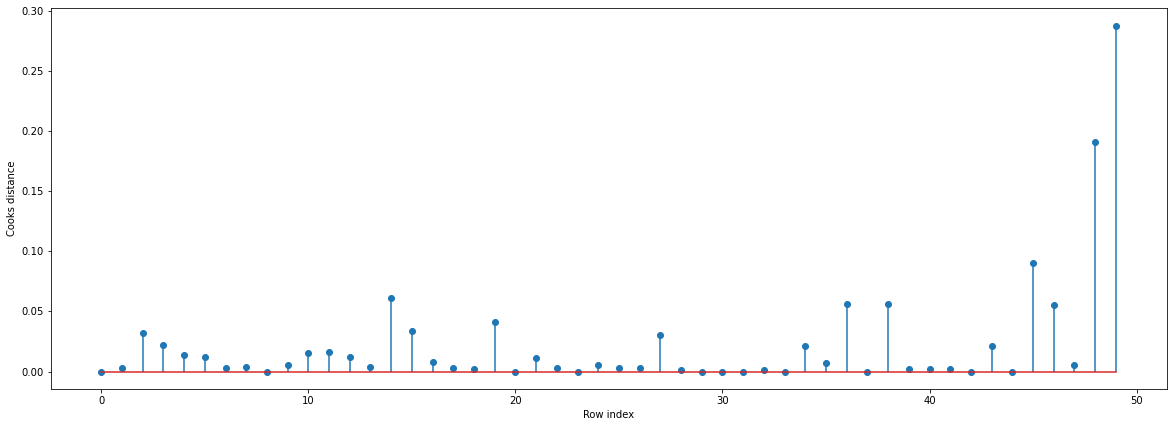

In [91]:
#ploting the influncers values using stem plot
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')

plt.show()

In [92]:
#index and value of influencer where c is more than .5
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

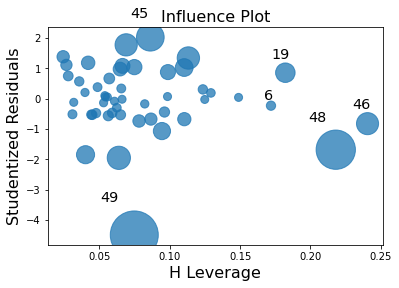

In [95]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

from the above plot it is evident that data point 48,49 are the influencers

In [102]:
startup[startup.index.isin([48,49])]

,R&D Spend,Administration,Marketing Spend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [99]:
#see the differences in the RD and other columns
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [100]:
#loading the data set
new_startup = pd.read_csv("50_Startups.csv")

In [103]:
#Discard / remove the data points which are influencers 
#and reasign the row number(reset_index())

In [104]:
startup1 = new_startup.drop(new_startup.index[[48,49]],axis=0).reset_index()

In [118]:
RDspend=pd.DataFrame(startup1['R&D Spend'])
Mspend=pd.DataFrame(startup1['Marketing Spend'])

In [119]:

model_1 = smf.ols('Profit~RDspend+Administration+Mspend',data=startup1).fit()

In [120]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           2.03e-31
Time:                        11:32:59   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RDspend            0.7895      0.036     21.718      0.000       0.716       0.863
Administration    -0.0633      0.044     -1.442      0.156      -0.152       0.025
Mspend             0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
model_influence_1 = model_1.get_influence()
(c_V, _)=model_influence_1.cooks_distance

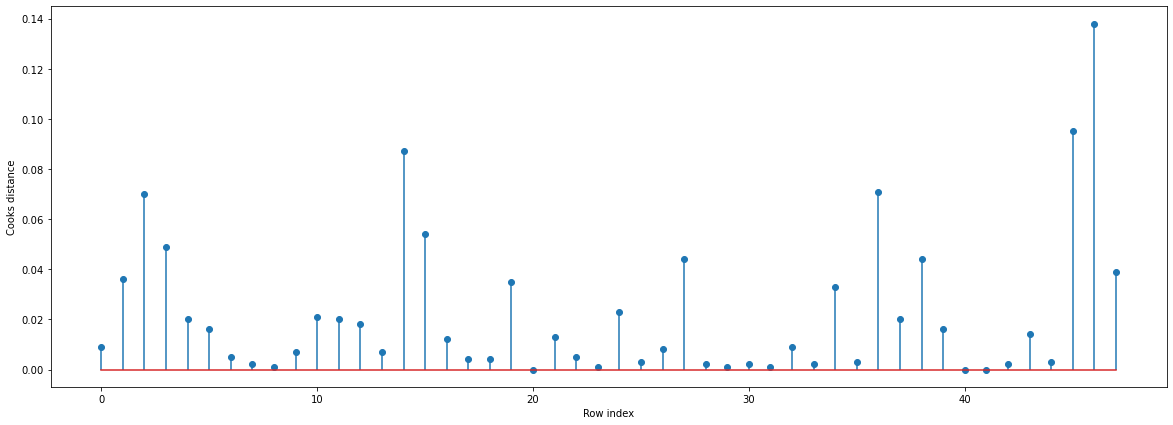

In [128]:
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c_V,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')

plt.show()

In [129]:
np.argmax(c_V),np.max(c_V)

(46, 0.13829133994334772)

#since the value is <1 we can stop the diagnostic process and finalize the model

In [131]:
#checking for the accuracyof the model
final_model = smf.ols('Profit~RDspend+Administration+Mspend',data=startup1).fit()

In [132]:
final_model.rsquared , final_model.aic

(0.9626766170294073, 994.6690439260116)

In [138]:

import statsmodels.api as sm

eval_env: 1


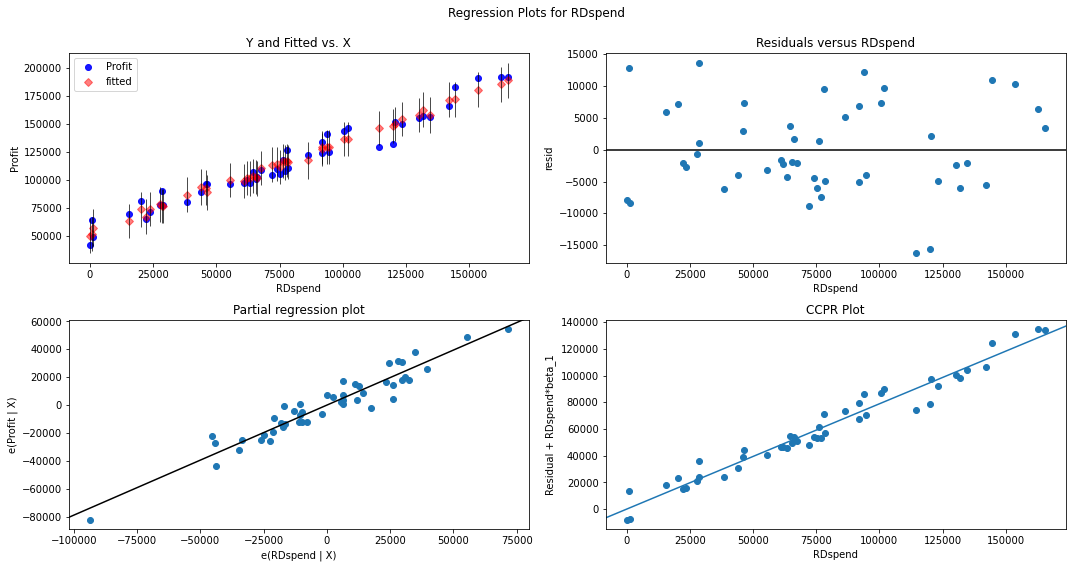

In [140]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model,"RDspend",fig=fig)
plt.show()